In [7]:
#@title Dependencies

print("Load dependencies - START")
!pip install qrcode > /dev/null 2>&1
!pip install memory_profiler > /dev/null 2>&1

import time
import random
import matplotlib.pyplot as plt
import numpy as np
import qrcode
from PIL import Image
import tracemalloc
import matplotlib.ticker as ticker

print("Load dependencies - END")

Load dependencies - START
Load dependencies - END


In [8]:
#@title Utils

def medir_memoria_intercambio(arreglo, idx1, idx2):
    tracemalloc.start()
    # Intercambiar dos elementos
    arreglo[idx1], arreglo[idx2] = arreglo[idx2], arreglo[idx1]
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak - current  # Queremos la memoria adicional utilizada

<ipython-input-10-47d9cd403dde>:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


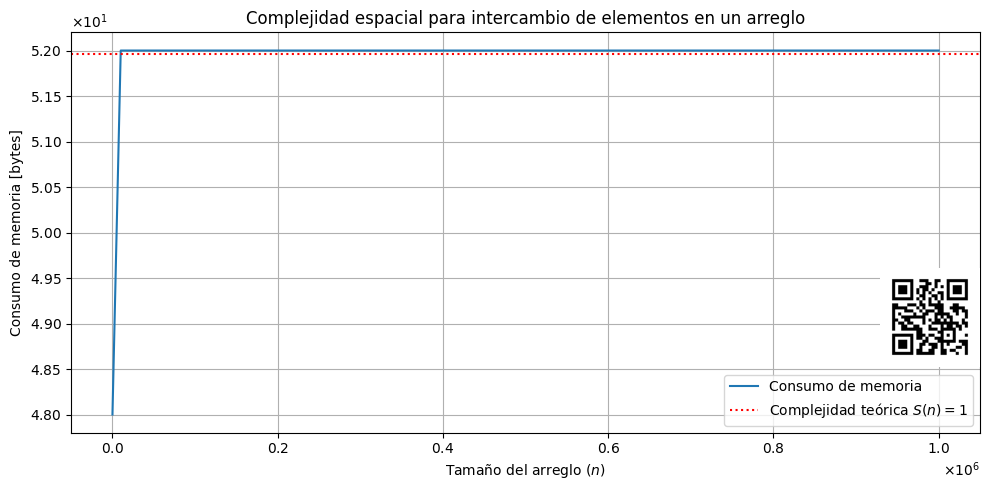

In [10]:
#@title Complejidad espacial

# Lista de tamaños de lista para probar
tamanos_lista = np.arange(1, 1001000, 10000)

# Inicializar arrays para el uso de memoria
memoria_intercambio = np.zeros(len(tamanos_lista))

average = 100

# Medir el uso de memoria 100 veces para cada tamaño de lista
for i, n in enumerate(tamanos_lista):
    memoria_intercambio_n = np.zeros(average)
    for j in range(average):
        lista = np.arange(n)
        idx1, idx2 = 0, n-1  # Intercambiar el primer y último elemento
        memoria_intercambio_n[j] = medir_memoria_intercambio(lista, idx1, idx2)
    memoria_intercambio[i] = np.mean(memoria_intercambio_n)

# Calcular la complejidad constante S(n) = 1
complejidad_constante = np.mean(memoria_intercambio)

# Generar el código QR
qr_data = "https://bit.ly/3VMfc7e"
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(qr_data)
qr.make(fit=True)
qr_img = qr.make_image(fill_color='black', back_color='white')

# Guardar la imagen del código QR
qr_img_path = "codigo_qr.png"
qr_img.save(qr_img_path, dpi=(300, 300))

# Cargar la imagen del código QR con PIL
qr_img_pil = Image.open(qr_img_path)

# Convertir la imagen de PIL a un formato que matplotlib puede manejar
qr_img_np = np.array(qr_img_pil)

# Graficar los resultados
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

# Gráfica: Memoria utilizada para intercambiar dos elementos en una lista
ax1.plot(tamanos_lista, memoria_intercambio, label='Consumo de memoria')
ax1.axhline(y=complejidad_constante, color='r', linestyle='dotted', label='Complejidad teórica $S(n) = 1$')
ax1.set_xlabel('Tamaño del arreglo ($n$)')
ax1.set_ylabel('Consumo de memoria [bytes]')
ax1.set_title('Complejidad espacial para intercambio de elementos en un arreglo')
ax1.legend(loc='lower right')
ax1.grid(True)

# Formatear los ejes x e y en notación científica
ax1.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Insertar la imagen del código QR en la gráfica
qr_position = [0.885, 0.23, 0.1, 0.25]
ax_inset = fig.add_axes(qr_position)
ax_inset.imshow(qr_img_np, cmap='gray')
ax_inset.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('complejidad_espacial_constante.png', dpi=300)
